In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
from Bio.Phylo._io import parse
from Bio.Phylo.BaseTree import Tree as BioTree

from src.datasets.load_trees import load_trees_from_file
from src.utils.tree_utils import get_taxa_names
from src.utils.tree_utils import get_tree_height
from src.distribution_analysis.process_tree import get_observed_nodes, get_clade_split_df

from scipy.stats import ks_2samp
from scipy.spatial.distance import pdist, squareform

from collections import Counter

In [2]:
trees = load_trees_from_file(Path("data/thinned_mcmc_runs/yule-50_100.trees"))

KeyboardInterrupt: 

In [ ]:
np.random.shuffle(trees)
trees = trees[:5000]

In [ ]:
from src.map_validation.tree_scores import squared_rooted_branch_score

average_distances = [
    squared_rooted_branch_score(tree_1, tree_2)
    for tree_1, tree_2 in zip(trees, trees[1:])
]

In [ ]:
np.mean(average_distances)

np.float64(0.0063447035035584685)

In [ ]:
def get_min_d(tree):
    return min(squared_rooted_branch_score(tree, other) for other in trees if other is not tree)

<Axes: >

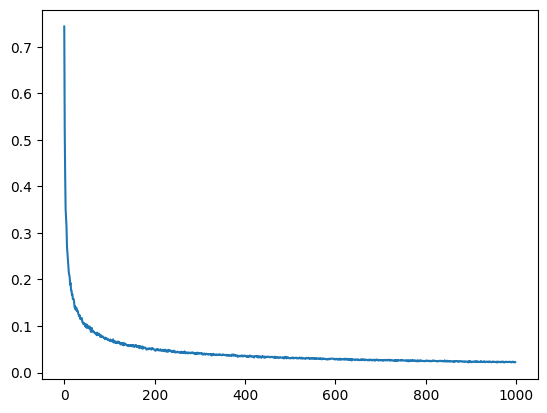

In [ ]:
d = []

for i in range(1, 1000):
    samples = np.random.normal(0, 1, (1000, i))
    distances = np.linalg.norm(samples[:-1] - samples[1:], axis=1)
    d += [float(np.std(distances) / np.mean(distances))] 

sns.lineplot(data=d)

AttributeError: Line2D.set() got an unexpected keyword argument 'name'

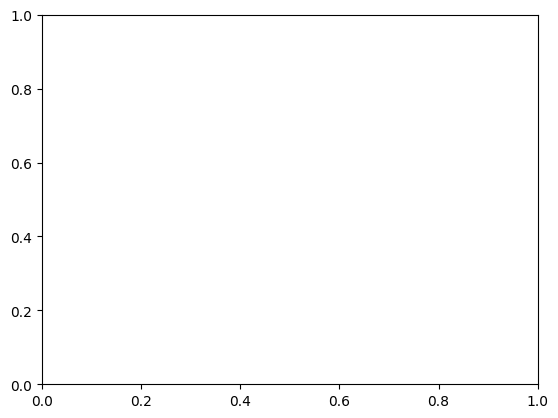

In [ ]:
d = []

for i in range(1, 21):
    samples = np.random.normal(0, 1, (4000, i))
    distances = np.linalg.norm(samples[:-1] - samples[1:], axis=1)

    distances = squareform(pdist(samples, metric="euclidean"))
    np.fill_diagonal(distances, np.inf)

    mean = np.mean(np.linalg.norm(samples[:-1] - samples[1:], axis=1))
    d.append(
        np.mean(np.mean(distances < mean, axis=0))
    )
sns.lineplot(data=d, name="JHHJ")
sns.lineplot(data=2*np.array(d))

In [ ]:
distances = squareform(pdist(samples, metric="euclidean"))
np.fill_diagonal(distances, np.inf)

mean = np.mean(np.linalg.norm(samples[:-1] - samples[1:], axis=1))

np.mean(np.mean(distances < mean, axis=0))

np.float64(0.538908)

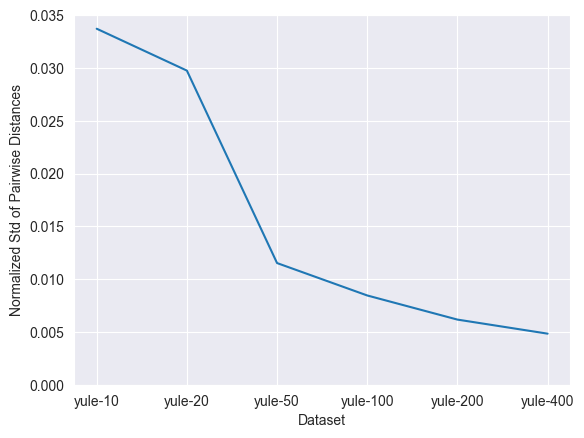

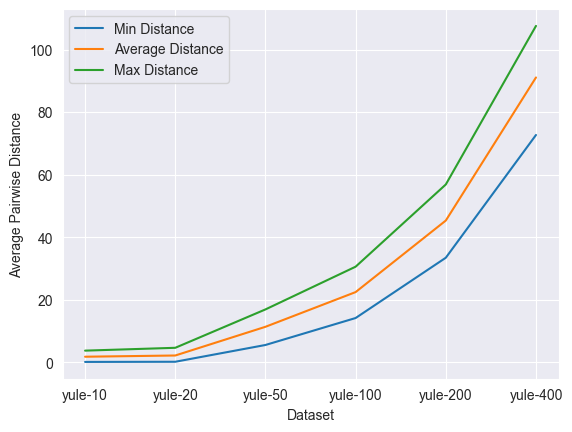

In [29]:
import pandas as pd
import seaborn as sns

from pathlib import Path

import matplotlib.pyplot as plt

sns.set_style("darkgrid")

DISTANCES_FILE = Path("data/distances_data/rf_distances.csv")

def distance_experiment():
    distances = pd.read_csv(DISTANCES_FILE)
    
    distances["dataset"] = distances.tree.apply(lambda x: x.split("_")[0])
    distances["normalized_var"] = np.sqrt(distances["avg_var_pairwise_distance"]) / distances["avg_pairwise_distance"]
    distances.sort_values("avg_pairwise_distance", inplace=True, ascending=True)

    sns.lineplot(data=distances, y="normalized_var", x="dataset", errorbar=None)
    # plt.yscale("log")
    
    plt.ylabel("Normalized Std of Pairwise Distances")
    plt.xlabel("Dataset")
    plt.ylim(0, 0.035)

    # plt.title("Average Ratio of Max to Min Pairwise Distance (RF)")

    plt.savefig("plots/curse/curse_ratio.png", dpi=300)
    plt.show()

    sns.lineplot(data=distances, y="avg_min_pairwise_distance", x="dataset", errorbar=None)
    sns.lineplot(data=distances, y="avg_pairwise_distance", x="dataset", errorbar=None)
    sns.lineplot(data=distances, y="avg_max_pairwise_distance", x="dataset", errorbar=None)

    plt.legend(labels=['Min Distance', 'Average Distance', 'Max Distance'])
    
    plt.ylabel("Average Pairwise Distance")
    plt.xlabel("Dataset")

    # plt.title("Average Pairwise Distance (RF)")

    plt.savefig("plots/curse/curse_distance.png", dpi=300)
    
distance_experiment()